In [26]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [29]:

train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_data.csv')

print("Training Data Head:")
print(train_data.head())
print("\nTest Data Head:")
print(test_data.head())

Training Data Head:
    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                    

In [ ]:

train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_data.csv')

print("Training Data Head:")
print(train_data.head())
print("\nTest Data Head:")
print(test_data.head())

Training Data Head:
    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                    

In [30]:
# Check for missing values
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Missing Values in Training Data:
Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                

In [33]:

train_data['Disease'] = train_data['Disease'].apply(lambda x: 0 if x == 'Healthy' else 1)

test_data['Disease'] = test_data['Disease'].apply(lambda x: 0 if x == 'Healthy' else 1)

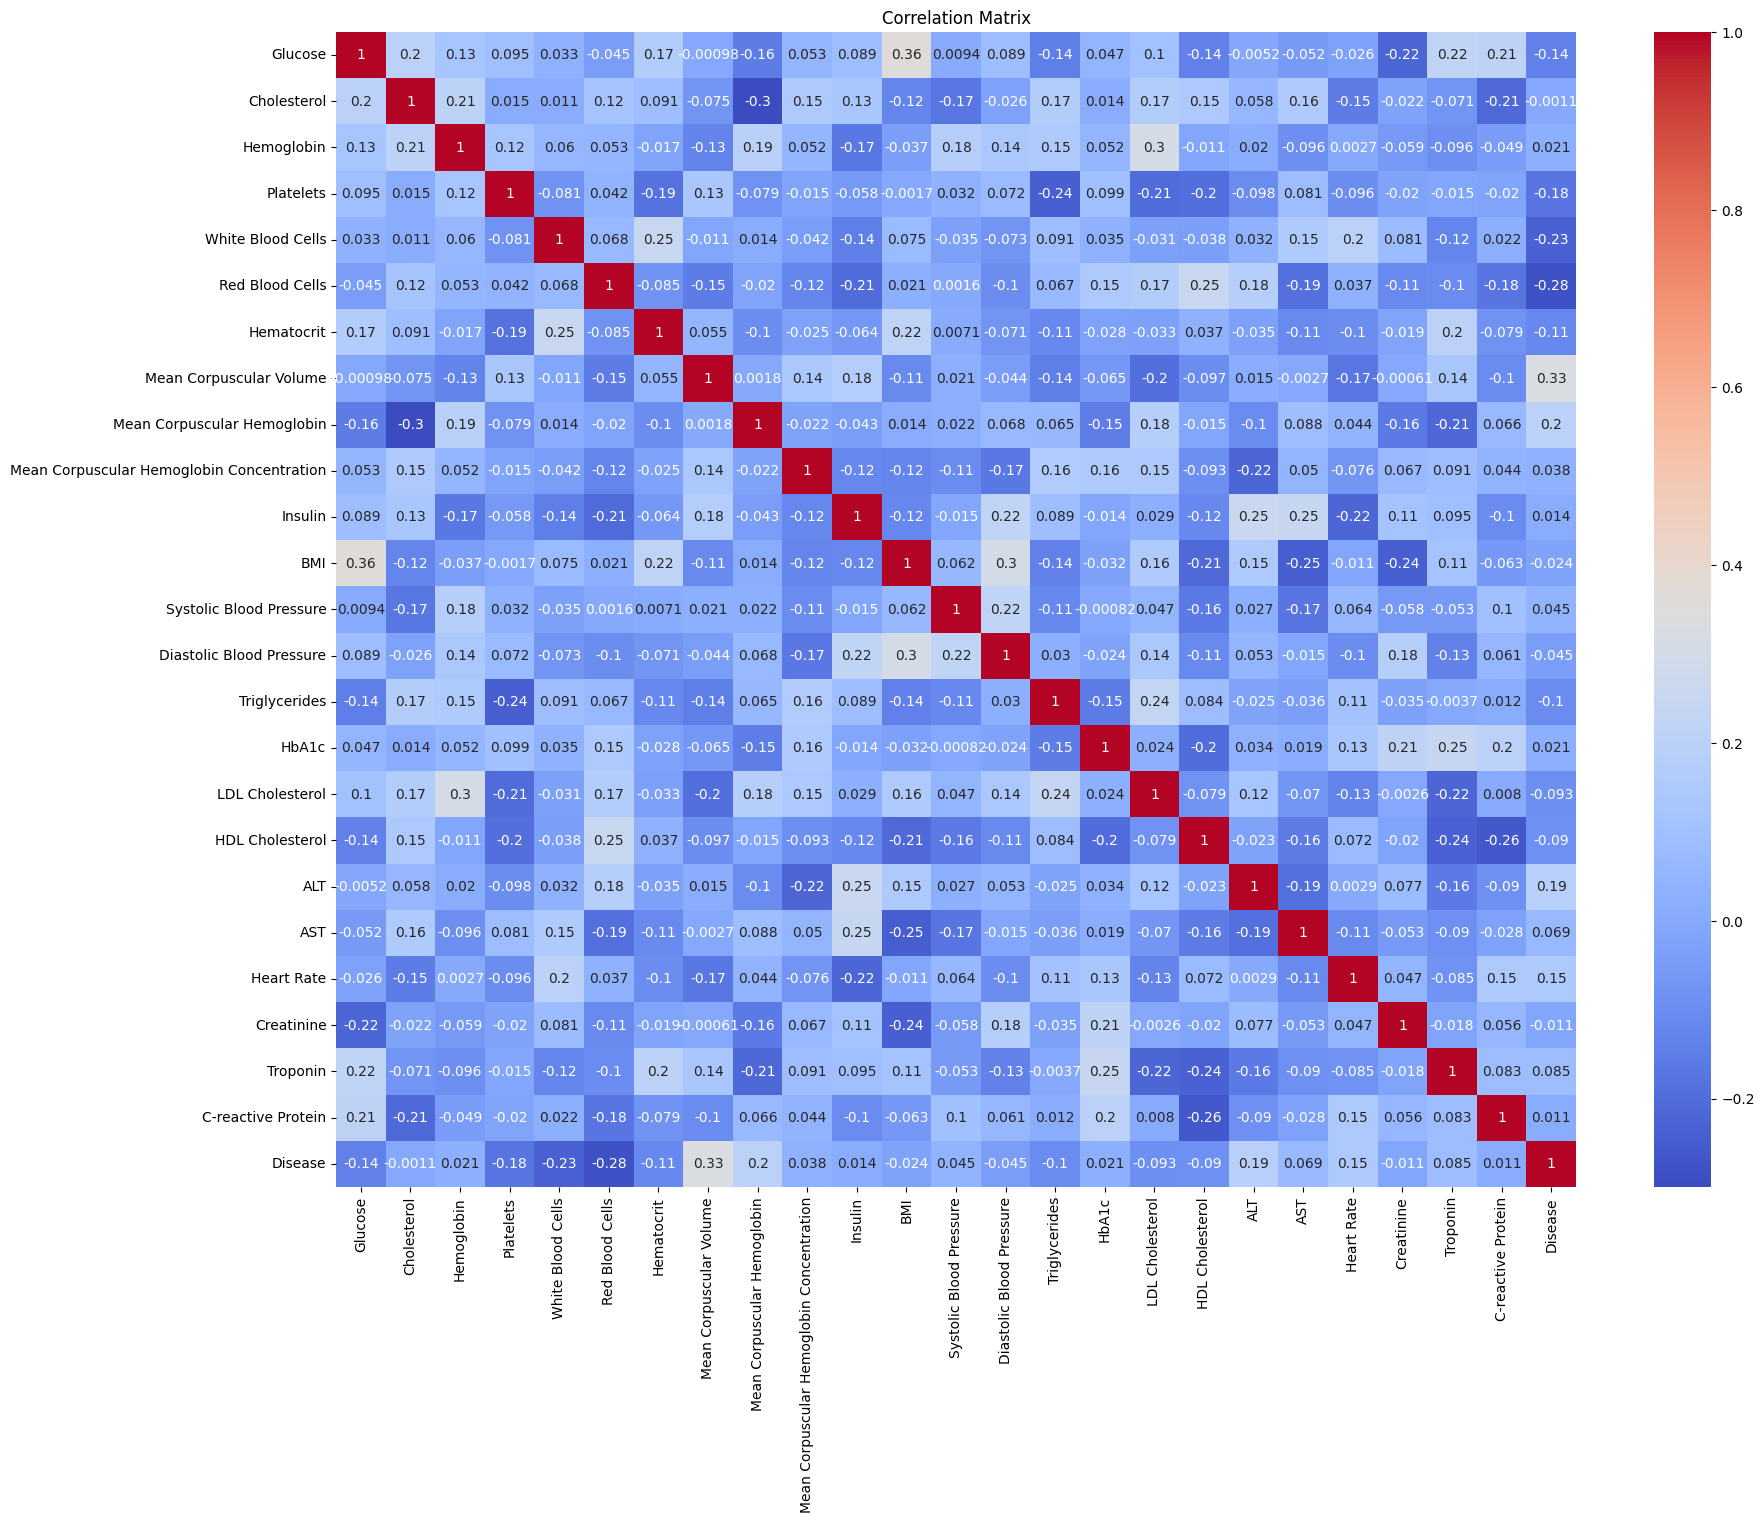

In [34]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(20,15 ))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [35]:

train_data['Cholesterol/HDL Ratio'] = train_data['Cholesterol'] / train_data['HDL Cholesterol']
test_data['Cholesterol/HDL Ratio'] = test_data['Cholesterol'] / test_data['HDL Cholesterol']

In [36]:

X_train = train_data.drop('Disease', axis=1)
y_train = train_data['Disease']


X_test = test_data.drop('Disease', axis=1)
y_test = test_data['Disease']


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)



y_pred = model.predict(X_test_scaled)



In [38]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.934156378600823
Precision: 0.9934065934065934
Recall: 0.9397089397089398
F1 Score: 0.9658119658119658
Confusion Matrix:
 [[  2   3]
 [ 29 452]]


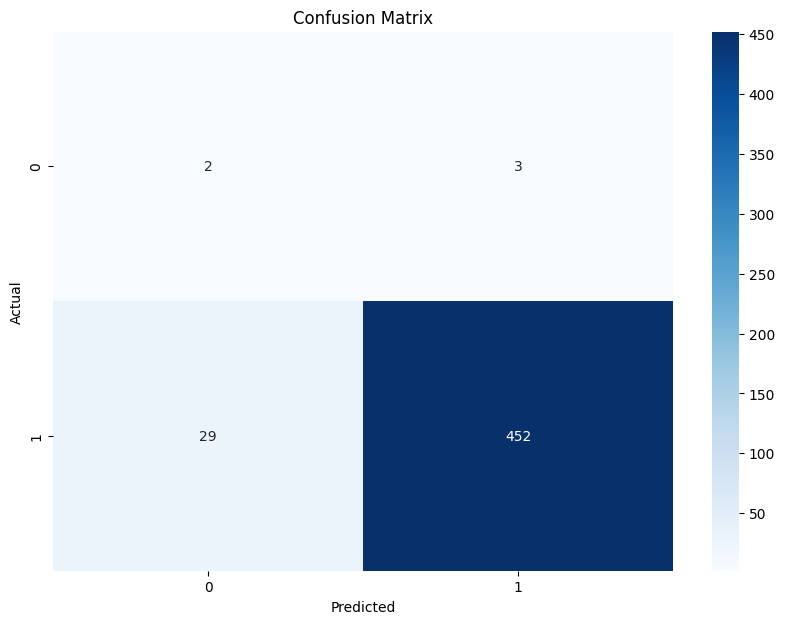

In [40]:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.06      0.40      0.11         5
           1       0.99      0.94      0.97       481

    accuracy                           0.93       486
   macro avg       0.53      0.67      0.54       486
weighted avg       0.98      0.93      0.96       486

